

1.   ابراهيم ابو اليزيد X1541
2.   خلود ناشر X2457
3.   عزة أبوغرسة X2182
4.   مرفت عبده X2451
5.    مريم أحمد X2069


*   Task-3: Cancer Doc Classification










###Connecting google Colab to google Deive to upload data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### importing libraries

In [ ]:
# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist

# Preprocessing
import re
import string
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import os

# Modeling
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Wordcloud
from wordcloud import WordCloud, STOPWORDS 


In [ ]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
     


### Define Metrics Function

In [ ]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_test, y_hat_test):
  # '''
   # First Function for Plotting Confusion Matrix
    #Second Function to Calculate and displays the following: Train and Test Score, Classification Report, 
   # and Confusion Matrix.
    
       # Parameters:
            
          #  clf: classifier or instanciated model from run_model function
          #  y_train: y train from test, train, split
           # y_test: y test from test, train, split
          #  y_hat_test: y hat test from run_model fuction
            
   # '''
   
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
   
def evaluate_model(clf, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Classifier: {clf}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    return [accuracy_score(y_test, y_hat_test), classification_report(y_test, y_hat_test)]
    

#  Read Data with info

In [ ]:
import pandas as pd
#to display the entire contents of a column, even if it contains long text strings or large numbers.
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('/content/drive/My Drive/cancer_text_classification.csv', encoding="ISO-8859-1")
data.head(1)

Unnamed: 0               0  \
0           0  Thyroid_Cancer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
data.shape

(7570, 3)

Drop the column "unnamed' since it is not useful:

In [ ]:
# unnamed not useful better to drop it
data.drop(['Unnamed: 0'], axis=1, inplace=True)
     

### Rename the columns

In [ ]:
data.rename(
    columns={ "0": "Cancer_type", "a": "Description"},
    inplace=True)

# reset  the display of the  dataframe to the default which is 50 for easy  reading
pd.set_option('display.max_colwidth', 50)
data.head(10)

,Cancer_type,Description
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
5,Thyroid_Cancer,This study was performed to explore the effec...
6,Thyroid_Cancer,This study was performed assess the clinical ...
7,Thyroid_Cancer,Journal of International Medical Research  Th...
8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...
9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...


# Explore Data

In [ ]:
# checking missing values
data.isnull().sum()

Cancer_type    0
Description    0
dtype: int64

### There is no missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cancer_type  7570 non-null   object
 1   Description  7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB


We have 7570 samples or observations, its data is an object meaning not numeric because it is text data. 




### Explore Target Column which is Cancer_type

In [ ]:
data.Cancer_type.value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Cancer_type, dtype: int64

In [ ]:
data['Description'].describe() #here unique is only 996

count                                                  7570
unique                                                  996
top       Thyroid surgery in  children in a single insti...
freq                                                     10
Name: Description, dtype: object

In [ ]:
#group by "Cancer_type" and "Description" to get unique item with visualize the count of duplication 
data_filtered = data.groupby(["Cancer_type","Description"]).size().reset_index(name='counts')
data_filtered

,Cancer_type,Description,counts
0,Colon_Cancer,gon§ales junior w effect of treatment w...,10
1,Colon_Cancer,bladder cancer is the tenth most common ca...,10
2,Colon_Cancer,breast cancer bc is the most common malign...,10
3,Colon_Cancer,dysregulation of lncrnas is frequent in gl...,10
4,Colon_Cancer,emerging evidence reveals that micrornas m...,10
...,...,...,...
991,Thyroid_Cancer,structures assigned to the products were conco...,10
992,Thyroid_Cancer,suffer from a high false positive rate because...,10
993,Thyroid_Cancer,test the hypothesis that levobupivacaine has a...,10
994,Thyroid_Cancer,thyroid cancer THCAprognosis and construct a p...,10


In [ ]:
data_filtered.Cancer_type.value_counts() #after removing duplicated rows

Lung_Cancer       452
Thyroid_Cancer    283
Colon_Cancer      261
Name: Cancer_type, dtype: int64

##under-sampling

In [ ]:
#under-sampling the source data in order to not be biased to 'Lung_Cancer' type 
data_filtered = data_filtered.sort_values(by=['Cancer_type'])
Colon_Cancer= data_filtered.loc[data_filtered['Cancer_type'] == 'Colon_Cancer']
Thyroid_Cancer= data_filtered.loc[data_filtered['Cancer_type'] == 'Thyroid_Cancer']
Lung_Cancer= data_filtered.loc[data_filtered['Cancer_type'] == 'Lung_Cancer']
Thyroid_Cancer = Thyroid_Cancer[:261]
Lung_Cancer = Lung_Cancer[:261]
frames = [Colon_Cancer, Thyroid_Cancer, Lung_Cancer]
data_after_under_sample = pd.concat(frames)
data_after_under_sample.Cancer_type.value_counts() 

Colon_Cancer      261
Thyroid_Cancer    261
Lung_Cancer       261
Name: Cancer_type, dtype: int64

### so what happened here that the under-sampling method is done by taking equal number of samples from the minority class which is here the colon_cancer class and concatenating them to form the new dataset.As we are seeing above.



# Visualize Data

<Figure size 720x720 with 0 Axes>

Text(-0.15000000000000002, 2810.5, '2810')

Text(0.85, 2580.5, '2580')

Text(1.85, 2180.5, '2180')

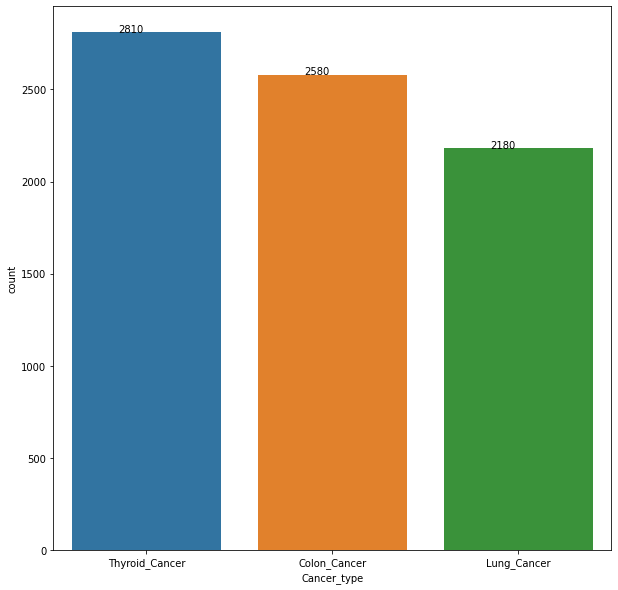

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
ax = sns.countplot(x=data["Cancer_type"],  data=data, order = data["Cancer_type"].value_counts().index )
for p, label in zip(ax.patches, data["Cancer_type"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

([<matplotlib.patches.Wedge at 0x7f74c615b820>,
 [Text(-1.1030975086962944, 0.4724149514018677, 'Lung_Cancer'),
  Text(0.284333486070626, -1.062616802379355, 'Thyroid_Cancer'),
  Text(0.8648721311662589, 0.6797030209819089, 'Colon_Cancer')],
 [Text(-0.643473546739505, 0.27557538831775613, '37.1%'),
  Text(0.15509099240215962, -0.5796091649341936, '34.1%'),
  Text(0.4717484351815957, 0.3707471023537685, '28.8%')])

(-1.2167948406389444,
 1.115372574829057,
 -1.115005388303276,
 1.1419571174225411)

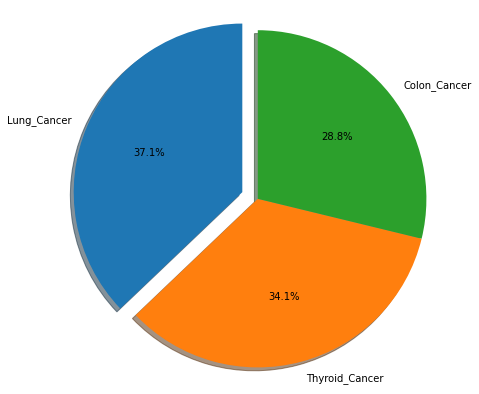

In [ ]:
#  plotting  pie plot
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(data["Cancer_type"].value_counts(),labels=('Lung_Cancer','Thyroid_Cancer','Colon_Cancer'),explode = [0.1,0,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')

plt.show()


### Plotting Word cloud for colon cancer class

<Figure size 1440x720 with 0 Axes>

(-0.5, 1599.5, 799.5, -0.5)

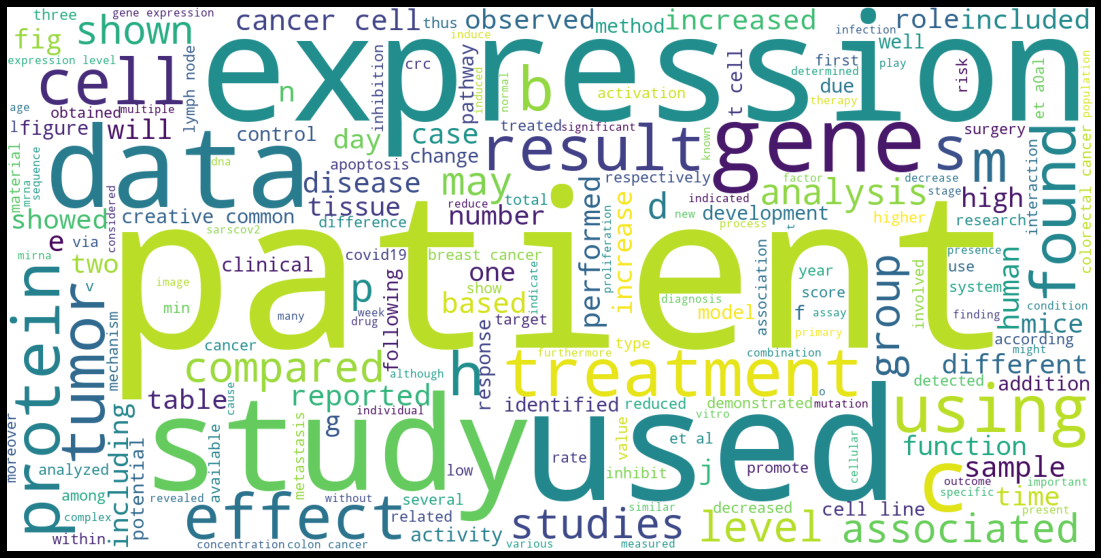

In [ ]:
#wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['Summary'].tolist()))
#plt.figure( figsize=(20,10), facecolor='k')
#plt.imshow(wordcloud)
#https://www.numpyninja.com/post/nlp-text-data-visualization
Colon_Cancer= data_filtered.loc[data_filtered['Cancer_type'] == 'Colon_Cancer']
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Colon_Cancer['Description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")


### Plotting Word cloud for Thyroid cancer class

<Figure size 1440x720 with 0 Axes>

(-0.5, 1599.5, 799.5, -0.5)

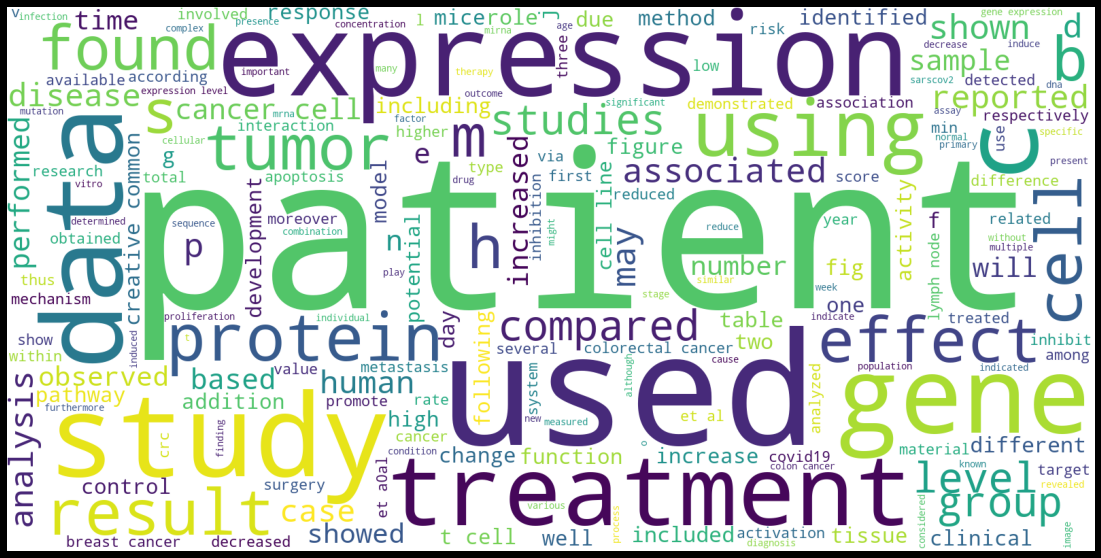

In [ ]:
Thyroid_Cancer= data_filtered.loc[data_filtered['Cancer_type'] == 'Thyroid_Cancer']
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Colon_Cancer['Description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

###  Plotting Word cloud for lung cancer class

<Figure size 1440x720 with 0 Axes>

(-0.5, 1599.5, 799.5, -0.5)

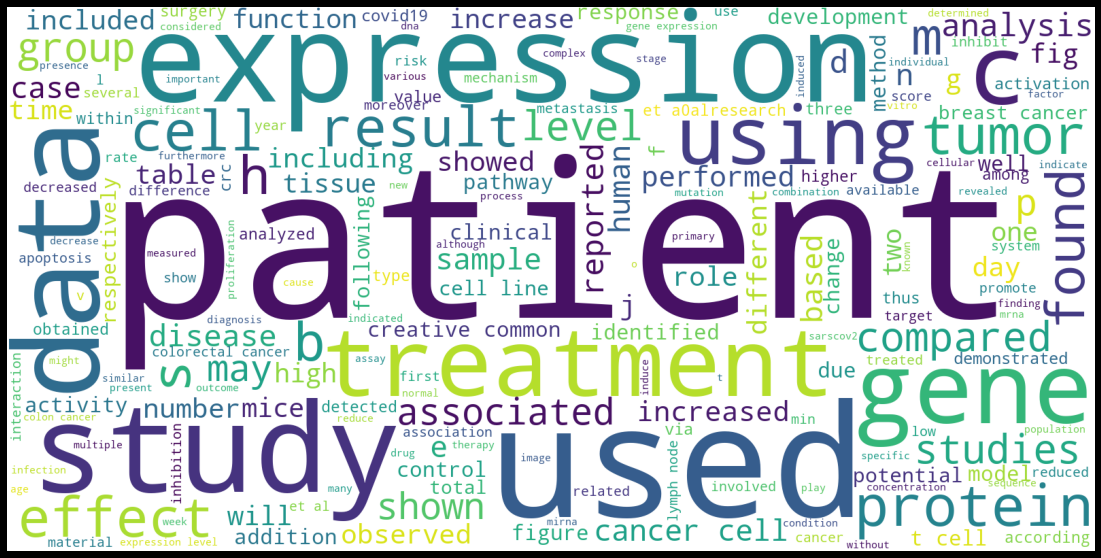

In [ ]:
Lung_Cancer= data_filtered.loc[data_filtered['Cancer_type'] == 'Lung_Cancer']
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Colon_Cancer['Description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

# Data Preprocessing

In [ ]:
data_after_under_sample['Description'].head(5)

0           gon§ales junior w   effect of treatment w...
166    "piglet diarrhea is one of the most severe dis...
167    "protein phosphatase 2a pp2a is a serinethreon...
168    "purpose squamous cell carcinomas and adenocar...
169    "purpose to assess the efficacy and safety of ...
Name: Description, dtype: object

### Cleaning Data

In [ ]:
import string
from string import digits
import re

def clean_description(data_filtered):

  # Remove all the special characters
  data_filtered.Description= data_filtered.Description.apply(lambda x: re.sub(r'\W', ' ', x))

  # remove all single characters folllowed by another single charachter
  data_filtered.Description= data_filtered.Description.apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+[a-zA-Z]\s+', ' ', x))

  # remove all single characters
  data_filtered.Description= data_filtered.Description.apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

  #remove word contains digits+string+digits without spaces
  data_filtered.Description= data_filtered.Description.apply(lambda x: re.sub(r'\d+[a-zA-Z]+\d+', ' ', x))

  #remove long number not seperated by comma or dot
  data_filtered.Description= data_filtered.Description.apply(lambda x: re.sub(r'\d{1,3}[^,|.]{3}\d', ' ', x))

  # Remove punctuation
  exclude=set(string.punctuation)
  data_filtered.Description= data_filtered.Description.apply(lambda x: ''.join(ch for ch in x if x not in exclude))
  #data_filtered.Description = data_filtered.Description.apply(lambda x: x.translate(None, string.punctuation))
  #data_filtered.data_filtered = data_filtered.Description.apply(lambda x: x.translate(None, string.digits))

  #in medical text data the longest word is forty-five letters , so we can not remove long words
  data_filtered.Description= data_filtered.Description.apply(lambda x: ' '.join(word for word in x.split() if len(word)< 46))

  #need to remove stop words and lemmatize
  #data_filtered.Description = data_filtered.Description.apply(lambda x: wordnet_lemmatizer.lemmatize(x))

  # Converting to Lowercase # we need to lower what is not prounn
  data_filtered.Description= data_filtered.Description.apply(lambda x: x.lower())

  # Substituting multiple spaces with single space
  data_filtered.Description= data_filtered.Description.apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))

  #data_filtered.Description= data_filtered.Description.apply(lambda x: lemmatize(x))


In [ ]:
import string , spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

def lemmatize(text):
  # Creating our token object, which is used to create documents with linguistic annotations.
  mytokens = parser(text) 
  # Lemmatizing each token and converting each token into lowercase
  mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
  # Removing stop words
  mytokens = [ word for word in mytokens if word not in stop_words]
  document = ' '.join(mytokens)
  # return preprocessed list of tokens
  return mytokens


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
clean_description(data_after_under_sample)
#data before under_sampling
clean_description(data_filtered)

In [ ]:
data_filtered.head(3) 
#lemmatized = data_filtered.loc[(data_filtered['Cancer_type'] == 'Colon_Cancer')].iloc[0]['Description']
#len(lemmatized)
#lemmatized

,Cancer_type,Description,counts
0,Colon_Cancer,gon ales junior effect of treatment with injec...,10
166,Colon_Cancer,piglet diarrhea is one of the most severe dise...,10
167,Colon_Cancer,protein phosphatase 2a pp2a is serinethreonine...,10


In [ ]:
data=data.drop_duplicates()  #  Return DataFrame with duplicate rows removed

#### Defining the list of stopwords that will include the English stopwords which will be imported from nltk library and adding to it puctiation. This defined  list of  the stopwords will be added later to the pipeline of the vecctorizer

In [ ]:
# from beefore
import nltk
nltk.download("stopwords")

# Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
stopwords_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Splitting Data

Beffore we split our data and train it, we need to perform more Preprocessing work. Data will be preprocessed as follows:

Target columns of Cancer_type will be label encoded while texs in the description column will be tokenized, then vectorized using one of vectorizer such as TFIDF.



### Applying text vectorization:
Text vectorization is the process of converting text data into numerical form,a matrix of token counts that we call it vectors, so that it can be analyzed and processed by machine learning algorithms. This is done by creating a mathematical representation of the text, such as a bag of words model, word embeddings, or document-term matrix. The resulting vectors capture the meaning and context of the words in the text and can be used as input features for various machine learning models, such as classification, clustering, or regression algorithms.

### Here,I will use TfidfVectorizer

### Encoding Labels

In [ ]:
le = LabelEncoder()

le.fit(data['Cancer_type'])

data['target'] = le.transform(data['Cancer_type'])
data.tail(5)
     

LabelEncoder()

<ipython-input-28-9ee7dedec64f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = le.transform(data['Cancer_type'])


,Cancer_type,Description,target
6863,Lung_Cancer,"""Missense mutation distribution in the exons a...",1
6929,Lung_Cancer,"""versus gemcitabine/carboplatin in advanced no...",1
7040,Thyroid_Cancer,Keloids are pathological scars that grow over...,2
7485,Colon_Cancer,the anization of cells into multiple membranou...,0
7497,Colon_Cancer,several immunotherapeutic strategies that harn...,0


### Define X and y and split the data to training/testing, with test-size=40%

#Encoded Classes

In [ ]:
# Dictionary to store sentiment values

target_key = {0: le.classes_[0], 1: le.classes_[1], 2: le.classes_[2]}
print(target_key)
     

{0: 'Colon_Cancer', 1: 'Lung_Cancer', 2: 'Thyroid_Cancer'}


# Define X and y

In [ ]:
from sklearn.model_selection import train_test_split

X = data['Description']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.40,
                                                    random_state=123,shuffle=True)
y_test.value_counts()
y_train.value_counts()

1    181
2    113
0    105
Name: target, dtype: int64

1    271
2    170
0    156
Name: target, dtype: int64

# defining tokenizer function for classifying text in pipeline

In [ ]:
# defining tokenizer function for classifying text in pipeline
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def text_tokenizer(text):
    return word_tokenize(text) #  function that takes in a string of text and returns a list of tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### TfidfVectorizer: Vectorization: TF-IDF

###Classifiers: 
LinearSVC, SGDClassifier,LogisticRegression,Random Forest balanced with smote and gridserch tuned, Multinomial NB, Adaboost, XGBoost, Neural Network

###Train-Test Split:
 60% Training, 40% Testing
### Evaluation:
 Confusion Matrix, Classification Report, Accuracy Score



### Classifier(1):Support Vector Classifier (LinearSVC)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
linear_svc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                                 tokenizer=text_tokenizer)),
                     ('clf', LinearSVC(class_weight='balanced'))])

linear_svc.fit(X_train, y_train)

     

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', LinearSVC(class_weight='balanced'))])

In [ ]:
# prediction
y_hat_train=linear_svc.predict(X_train)
y_hat_test = linear_svc.predict(X_test)



Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', LinearSVC(class_weight='balanced'))])
------------------------------------------------------------


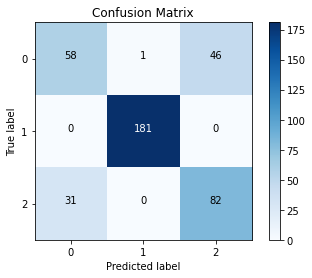

test accuracy: 0.8045112781954887
train accuracy: 0.9899497487437185
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          58    1   46  105
1           0  181    0  181
2          31    0   82  113
All        89  182  128  399

test report:
              precision    recall  f1-score   support

           0       0.65      0.55      0.60       105
           1       0.99      1.00      1.00       181
           2       0.64      0.73      0.68       113

    accuracy                           0.80       399
   macro avg       0.76      0.76      0.76       399
weighted avg       0.80      0.80      0.80       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.8

In [ ]:
from sklearn import metrics

results=evaluate_model(linear_svc, y_train, y_test, y_hat_train, y_hat_test)
svm_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
svm_test_acc


In [ ]:
# summarizing my results
my_results = []
my_res = {
    "model": "LinearSVC",
    "type": "Linear Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df


,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511


### Classifier # 2: Multinomial Naive Bayes (MulitinomialNB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=text_tokenizer)),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
text_mnb.fit(X_train, y_train)
     

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', MultinomialNB())])

In [ ]:
#Predictions
y_hat_train=text_mnb.predict(X_train)
y_hat_test = text_mnb.predict(X_test)


### Metrics

Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', MultinomialNB())])
------------------------------------------------------------


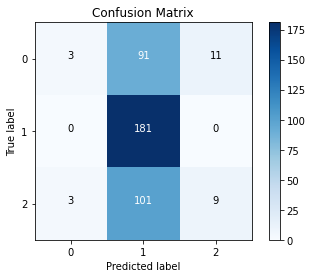

test accuracy: 0.48370927318295737
train accuracy: 0.6365159128978225
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted  0    1   2  All
Actual                    
0          3   91  11  105
1          0  181   0  181
2          3  101   9  113
All        6  373  20  399

test report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.05       105
           1       0.49      1.00      0.65       181
           2       0.45      0.08      0.14       113

    accuracy                           0.48       399
   macro avg       0.48      0.37      0.28       399
weighted avg       0.48      0.48      0.35       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.48

In [ ]:
results=evaluate_model(text_mnb, y_train, y_test, y_hat_train, y_hat_test)
mnb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
mnb_test_acc

In [ ]:
my_res = {
    "model": "MulitinomialNB",
    "type": "naive Bayes Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709


###Classifier3:SGDClassifier (stochastic gradient descent)


In [ ]:
from sklearn.linear_model import SGDClassifier
text_sgdc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                                tokenizer=text_tokenizer)),
                     ('clf', SGDClassifier())])


text_sgdc.fit(X_train, y_train)
     


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', SGDClassifier())])

In [ ]:
#Predictions
y_hat_train=text_sgdc.predict(X_train)
y_hat_test = text_sgdc.predict(X_test)


#Metrics

Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', SGDClassifier())])
------------------------------------------------------------


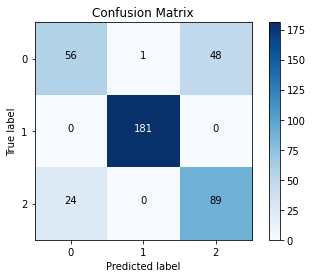

test accuracy: 0.8170426065162907
train accuracy: 0.9899497487437185
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          56    1   48  105
1           0  181    0  181
2          24    0   89  113
All        80  182  137  399

test report:
              precision    recall  f1-score   support

           0       0.70      0.53      0.61       105
           1       0.99      1.00      1.00       181
           2       0.65      0.79      0.71       113

    accuracy                           0.82       399
   macro avg       0.78      0.77      0.77       399
weighted avg       0.82      0.82      0.81       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.82

In [ ]:
results=evaluate_model(text_sgdc, y_train, y_test, y_hat_train, y_hat_test)
sgd_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
sgd_test_acc
    

In [ ]:
# Collecting Results
my_res = {
    "model": "SGD",
    "type": "Stochastic Gradient Descent (SGD)",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df
     

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043


 
### Classifier #4 LogisticRegression 

In [ ]:
from sklearn.linear_model import LogisticRegression
text_lr = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                              tokenizer=text_tokenizer)),
                     ('clf', LogisticRegression())])

text_lr.fit(X_train, y_train)
     


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', LogisticRegression())])

In [ ]:
#Predictions
y_hat_train=text_lr.predict(X_train)
y_hat_test = text_lr.predict(X_test)



Metrics

Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', LogisticRegression())])
------------------------------------------------------------


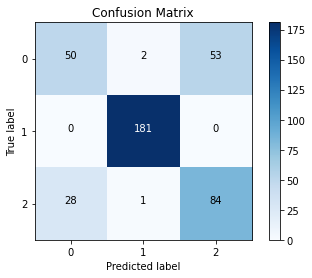

test accuracy: 0.7894736842105263
train accuracy: 0.983249581239531
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          50    2   53  105
1           0  181    0  181
2          28    1   84  113
All        78  184  137  399

test report:
              precision    recall  f1-score   support

           0       0.64      0.48      0.55       105
           1       0.98      1.00      0.99       181
           2       0.61      0.74      0.67       113

    accuracy                           0.79       399
   macro avg       0.75      0.74      0.74       399
weighted avg       0.79      0.79      0.78       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
results=evaluate_model(text_lr, y_train, y_test, y_hat_train, y_hat_test)
lgr_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
 

In [ ]:
my_res = {
    "model": "LogisticRegression",
    "type": "Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474


# Classifier #5 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_rfc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=text_tokenizer)),
                     ('clf', RandomForestClassifier(class_weight='balanced'))])

text_rfc.fit(X_train, y_train)
     

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [ ]:
#Predictions
y_hat_train=text_rfc.predict(X_train)
y_hat_test = text_rfc.predict(X_test)


# Metrics

Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', RandomForestClassifier(class_weight='balanced'))])
------------------------------------------------------------


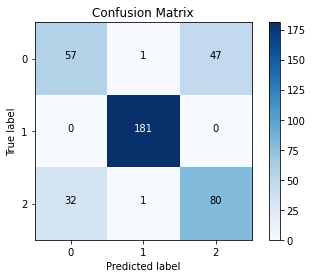

test accuracy: 0.7969924812030075
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          57    1   47  105
1           0  181    0  181
2          32    1   80  113
All        89  183  127  399

test report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59       105
           1       0.99      1.00      0.99       181
           2       0.63      0.71      0.67       113

    accuracy                           0.80       399
   macro avg       0.75      0.75      0.75       399
weighted avg       0.80      0.80      0.79       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.8

In [ ]:
results=evaluate_model(text_rfc, y_train, y_test, y_hat_train, y_hat_test)
rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
rf_test_acc
     


In [ ]:
my_res = {
    "model": "RandomForestClassifier",
    "type": "Class=WeightBalance",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474
4,RandomForestClassifier,Class=WeightBalance,0.796992


my models showed different accuracy, however there is a big discrepancy between train and test, this discrepancy shows an overfitting issue and can be solved by adjusting the weight balance in all classes and hypertuning the parameters. I will play first with the weight balance. Later, I will work in optimizing the parameters. Since Stochastic Gradient Descent (SGD) and RandomForestClassifier both showed the best result,I will further work in balancing the classes with smote techniques.



###Balancing with Smote
SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used in machine learning to balance class imbalances by generating synthetic samples in the minority class. The technique works by selecting similar instances in the minority class and creating new synthetic samples along the line connecting the selected instances and their nearest neighbors in the minority class. SMOTE helps overcome the issue of having a small number of instances in the minority class, which can lead to biased learning models.




In [ ]:
from imblearn.pipeline import make_pipeline # make_pipeline from imblearn library is used for dealing with imbalanced dataset
from imblearn.over_sampling import  SMOTE
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                            tokenizer=text_tokenizer)

sgdc =SGDClassifier()

     

###sgdc - SMOTE


In [ ]:
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),sgdc)
SMOTE_pipeline.fit(X_train, y_train)
  

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
#Predictions
y_hat_train=SMOTE_pipeline.predict(X_train)
y_hat_test = SMOTE_pipeline.predict(X_test)


#Metrics

Classifier: Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('sgdclassifier', SGDClassifier())])
------------------------------------------------------------


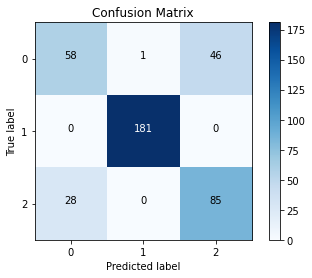

test accuracy: 0.8120300751879699
train accuracy: 0.981574539363484
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          58    1   46  105
1           0  181    0  181
2          28    0   85  113
All        86  182  131  399

test report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.61       105
           1       0.99      1.00      1.00       181
           2       0.65      0.75      0.70       113

    accuracy                           0.81       399
   macro avg       0.77      0.77      0.77       399
weighted avg       0.81      0.81      0.81       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.81

In [ ]:
results=evaluate_model(SMOTE_pipeline, y_train, y_test, y_hat_train, y_hat_test)
smote_sgd_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
smote_sgd_test_acc 
     


In [ ]:
my_res = {
    "model": "SGD - SMOTE ",
    "type": "Stochastic Gradient Descent (SGD) Balanced by Smote",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474
4,RandomForestClassifier,Class=WeightBalance,0.796992
5,SGD - SMOTE,Stochastic Gradient Descent (SGD) Balanced by ...,0.812030


#### smote  added little improvment in the aacuracy of SGD which changed from 0.809524 to 0.814536, which is not good enough. Now  let's  try smote in random forest  classifier

### RFC - SMOTE
Trying balancing with Smote in Random forest model

In [ ]:
tfidf = TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                             tokenizer=text_tokenizer)

rfc = RandomForestClassifier(class_weight='balanced')
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)
SMOTE_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [ ]:
#Predictions
y_hat_train=SMOTE_pipeline.predict(X_train)
y_hat_test = SMOTE_pipeline.predict(X_test)



### Metrics

Classifier: Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])
------------------------------------------------------------


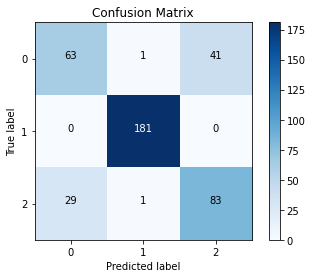

test accuracy: 0.8195488721804511
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          63    1   41  105
1           0  181    0  181
2          29    1   83  113
All        92  183  124  399

test report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       105
           1       0.99      1.00      0.99       181
           2       0.67      0.73      0.70       113

    accuracy                           0.82       399
   macro avg       0.78      0.78      0.78       399
weighted avg       0.82      0.82      0.82       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.82

In [ ]:
results=evaluate_model(SMOTE_pipeline, y_train, y_test, y_hat_train, y_hat_test)
smote_rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
smote_rf_test_acc 

In [ ]:
my_res = {
    "model": "RFC - SMOTE ",
    "type": "Randomforest Balanced by Smote",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474
4,RandomForestClassifier,Class=WeightBalance,0.796992
5,SGD - SMOTE,Stochastic Gradient Descent (SGD) Balanced by ...,0.812030
6,RFC - SMOTE,Randomforest Balanced by Smote,0.819549


#### Hyper Tunning
With tring smote there was no any improvment.Now I will try to hypertune the parameters and look for the best parameter and best estimator, so I can plug it again in my model and check if the metrics will improve.



In [ ]:
# parameters  oof random forest  classifier
params = {'randomforestclassifier__criterion':['gini','entropy'],
             'randomforestclassifier__max_depth':[None, 5, 3, 10],
             'randomforestclassifier__min_samples_leaf': [1,2,3],
         'randomforestclassifier__max_features':['auto','sqrt',3,5,10,30,70]}
     

In [ ]:
# defining the pipline that includes victorizer, smote and the random forest classiffier
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)


In [ ]:
# defining the pipeline of the hypertuning through gridsearch
grid = GridSearchCV(SMOTE_pipeline, cv=5, n_jobs=-1, param_grid=params ,
                    scoring='recall_macro')
     

In [ ]:
# fitting the model which will take several hours because of the too many parameters

import time
start = time.time()

grid.fit(X_train, y_train)

end = time.time()
print("Time taken in seconds: ", end - start)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                   

Time taken in seconds:  8693.985991716385


Fitting the grid search model with all above parameters takes about 3 hours. This long fittting because of the large number of parameters that I used. With seven different values for the criterion, four for max_depth, three for min_samples_leaf and seven for max_features, the number of combinations being tried by the GridSearch model is large. Each combination of parameters was  fit to the data and evaluated, which takes time. Additionally, I set the
 cross-validation cv=5 which made GridSearch to use a 5-fold cross-validation, meaning the model is being trained and evaluated five times for each combination of parameters. This significantly increases the amount of time it takes to fit the model. However, it  miht take even longer if  I ddidn't set the parameter  of n_jobs to -1, which made my model work in parralel processing. Parallel proccessing is good method to increase the speed because it uses all core of the CPU together but at the sametime it consumes the memory and that may crash the computation which happened to me and made me to restart and run all cells again for extra 3 hours.

In [ ]:
grid.score(X_test, y_test)

0.6935805590672848

### Research best estimator from grid

In [ ]:
grid.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 3,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 3}

In [ ]:
# Research best estimator from grid
best_pipe = grid.best_estimator_
best_pipe

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features='sqrt',
                    

In [ ]:
best_pipe.fit(X_train,y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features='sqrt',
                    

In [ ]:
#Predictions
y_hat_train=best_pipe.predict(X_train)
y_hat_test = best_pipe.predict(X_test)


Classifier: Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('smote', SMOTE(random_state=123)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features='sqrt',
        

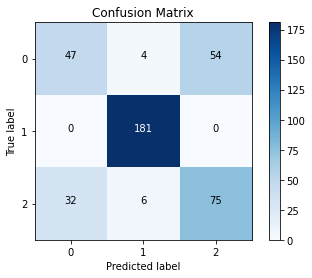

test accuracy: 0.7593984962406015
train accuracy: 0.88107202680067
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1    2  All
Actual                      
0          47    4   54  105
1           0  181    0  181
2          32    6   75  113
All        79  191  129  399

test report:
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       105
           1       0.95      1.00      0.97       181
           2       0.58      0.66      0.62       113

    accuracy                           0.76       399
   macro avg       0.71      0.70      0.70       399
weighted avg       0.75      0.76      0.75       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.76

In [ ]:
results=evaluate_model(best_pipe, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc


In [ ]:
my_res = {
    "model": "RFC -GridSearch ",
    "type": "Randomforest Hypertuned by best estimator",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df
     

,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474
4,RandomForestClassifier,Class=WeightBalance,0.796992
5,SGD - SMOTE,Stochastic Gradient Descent (SGD) Balanced by ...,0.812030
6,RFC - SMOTE,Randomforest Balanced by Smote,0.819549
7,RFC -GridSearch,Randomforest Hypertuned by best estimator,0.759398


#### Hypertunning also didn't add any  improvement. I will try other models that are well-known for their good accuracy results such as AdaBoost,XGBoost and neural network.


###  AdaBoost Classifier

In [ ]:
# Instantiate classifier, fit, and predict on test data
from sklearn.ensemble import  AdaBoostClassifier


text_adc=Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=text_tokenizer)),
                     ('clf', AdaBoostClassifier())])

text_adc.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', AdaBoostClassifier())])

In [ ]:
#Predictions
y_hat_train=text_adc.predict(X_train)
y_hat_test = text_adc.predict(X_test)


Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', AdaBoostClassifier())])
------------------------------------------------------------


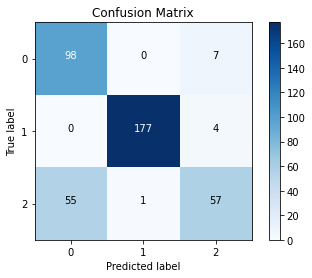

test accuracy: 0.8320802005012531
train accuracy: 0.8626465661641541
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1   2  All
Actual                      
0           98    0   7  105
1            0  177   4  181
2           55    1  57  113
All        153  178  68  399

test report:
              precision    recall  f1-score   support

           0       0.64      0.93      0.76       105
           1       0.99      0.98      0.99       181
           2       0.84      0.50      0.63       113

    accuracy                           0.83       399
   macro avg       0.82      0.81      0.79       399
weighted avg       0.86      0.83      0.83       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.83

In [ ]:
# Evaluate classifier
results=evaluate_model(text_adc, y_train, y_test, y_hat_train, y_hat_test)

ada_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
ada_test_acc
     

####  So far AdaBoost Classifier is the best classifier where the training accuracy and testing score are close i.e. 83% for testting and 86% for training

#### Summarizing Results

In [ ]:
my_res = {
    "model": "text_adc ",
    "type": "AdaBoost classifier ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df


,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474
4,RandomForestClassifier,Class=WeightBalance,0.796992
5,SGD - SMOTE,Stochastic Gradient Descent (SGD) Balanced by ...,0.812030
6,RFC - SMOTE,Randomforest Balanced by Smote,0.819549
7,RFC -GridSearch,Randomforest Hypertuned by best estimator,0.759398
8,text_adc,AdaBoost classifier,0.832080


### XGBoost Classifier

In [ ]:
# Instantiate classifier, fit, and predict on test data


text_xgb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                              tokenizer=text_tokenizer)),
                     ('clf', XGBClassifier())])

text_xgb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', XGBClassifier(objective='multi:softprob'))])

In [ ]:
#Predictions
y_hat_train=text_xgb.predict(X_train)
y_hat_test = text_xgb.predict(X_test)

     


### summarizing Results

Classifier: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function text_tokenizer at 0x7f74bf4ad3a0>)),
                ('clf', XGBClassifier(objective='multi:softprob'))])
------------------------------------------------------------


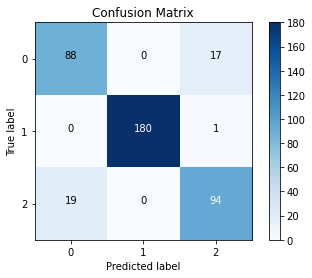

test accuracy: 0.9072681704260651
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1    2  All
Actual                       
0           88    0   17  105
1            0  180    1  181
2           19    0   94  113
All        107  180  112  399

test report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       1.00      0.99      1.00       181
           2       0.84      0.83      0.84       113

    accuracy                           0.91       399
   macro avg       0.89      0.89      0.89       399
weighted avg       0.91      0.91      0.91       399

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.91

In [ ]:
results=evaluate_model(text_xgb, y_train, y_test, y_hat_train, y_hat_test)
xgb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
xgb_test_acc
  

XGBoost Classifier shows better accuraacy score and there is small difference btween the testing accuracy score i.e. 91% and the training accuracy score which is 100%. Howervr such an accuracy score is an indicate oof overfitting isssue

#### Summarize Results

In [ ]:
my_res = {
    "model": "text_xgb ",
    "type": "XGBoost Classifier ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df
     


,model,type,Test Accuracy
0,LinearSVC,Linear Classifier,0.804511
1,MulitinomialNB,naive Bayes Classifier,0.483709
2,SGD,Stochastic Gradient Descent (SGD),0.817043
3,LogisticRegression,Classifier,0.789474
4,RandomForestClassifier,Class=WeightBalance,0.796992
5,SGD - SMOTE,Stochastic Gradient Descent (SGD) Balanced by ...,0.812030
6,RFC - SMOTE,Randomforest Balanced by Smote,0.819549
7,RFC -GridSearch,Randomforest Hypertuned by best estimator,0.759398
8,text_adc,AdaBoost classifier,0.832080
9,text_xgb,XGBoost Classifier,0.907268


### Neural Network Classifier

### Define Metric Function

In [ ]:
def evaluate_clf(y_true, y_pred):
    """Return confusion matrix, classification report, and accuracy score
    for a classifier.
    
    Parameters
    ----------
    y_true : array-like
        Target class labels
    y_pred : array-like
        Predicted class labels
        
    Returns
    ----------
    Confusion matrix, classification report, accuracy score
    """
    
    test_acc = round(accuracy_score(y_true, y_pred), 2)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---'*20)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('---'*20)
    print('Test Accuracy:')
    print(test_acc)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

vectorizer = TfidfVectorizer(max_features=100)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

model = Sequential()

model.add(Dense(100, input_dim=100, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# convert the predicted probabilities to class labels
y_pred_class = y_pred.argmax(axis=1)

# calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy: ", accuracy)

# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

# create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix: \n", conf_matrix)

# create the classification report
class_report = classification_report(y_test, y_pred_class)
print("Classification Report: \n", class_report)

Epoch 1/5
6/6 [==============================] - 1s 51ms/step - loss: 1.0850 - accuracy: 0.4305 - val_loss: 1.0701 - val_accuracy: 0.4536
Epoch 2/5
6/6 [==============================] - 0s 12ms/step - loss: 1.0667 - accuracy: 0.4539 - val_loss: 1.0554 - val_accuracy: 0.4536
Epoch 3/5
6/6 [==============================] - 0s 13ms/step - loss: 1.0543 - accuracy: 0.4539 - val_loss: 1.0459 - val_accuracy: 0.4536
Epoch 4/5
6/6 [==============================] - 0s 10ms/step - loss: 1.0453 - accuracy: 0.4539 - val_loss: 1.0371 - val_accuracy: 0.4536
Epoch 5/5
6/6 [==============================] - 0s 10ms/step - loss: 1.0359 - accuracy: 0.4539 - val_loss: 1.0273 - val_accuracy: 0.4536


13/13 [==============================] - 0s 2ms/step
Accuracy:  0.45363408521303256
13/13 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.4536
Test Loss:  1.0272917747497559
Test Accuracy:  0.4536340832710266
Confusion Matrix: 
 [[  0 105   0]
 [  0 181   0]
 [  0 113   0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.45      1.00      0.62       181
           2       0.00      0.00      0.00       113

    accuracy                           0.45       399
   macro avg       0.15      0.33      0.21       399
weighted avg       0.21      0.45      0.28       399



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
###  plotting Confusion Matrix

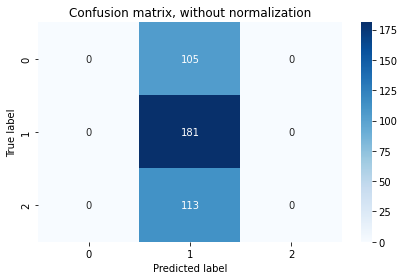

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, classes=None, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    if classes:
        sns.heatmap(conf_matrix, annot=True, xticklabels=classes, yticklabels=classes, cmap=cmap, fmt="d")
    else:
        sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt="d")
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=[0, 1, 2])